In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
learning_rate = 0.01
epoch = 10

In [3]:
n_samples = 10
X = np.linspace(0,10,n_samples)
Y = 5*X + 5*np.random.randn(n_samples)

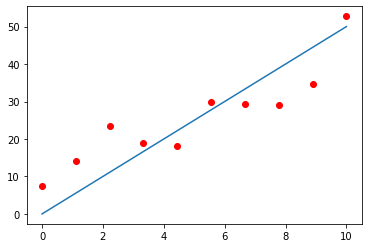

In [4]:
plt.plot(X, Y, 'ro')
plt.plot(X, 5*X)
plt.show()

In [5]:
W = tf.Variable(np.random.rand(), name = 'weights')
B = tf.Variable(np.random.rand(), name = 'bias')

In [6]:
print(W,B)

<tf.Variable 'weights:0' shape=() dtype=float32, numpy=0.86653143> <tf.Variable 'bias:0' shape=() dtype=float32, numpy=0.08141032>


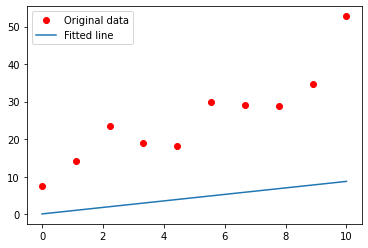

In [7]:
# Graphic display before Training
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + B), label='Fitted line')
plt.legend()
plt.show()

In [8]:
# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + B


In [9]:
# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [10]:
# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [11]:
# Optimization process. 
def train_step(X,Y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W,B])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W,B]))

step: 1, loss: 84.548782, W: 3.516230, b: 0.508392


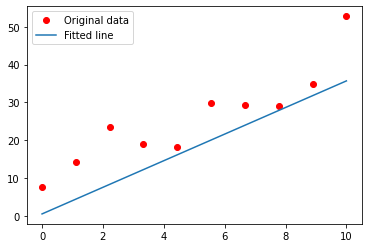

step: 2, loss: 47.633369, W: 4.258627, b: 0.661865


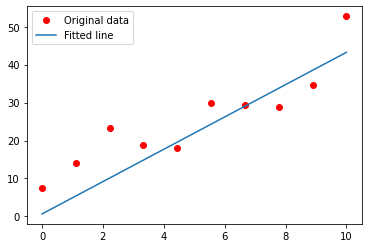

step: 3, loss: 44.501110, W: 4.463250, b: 0.738028


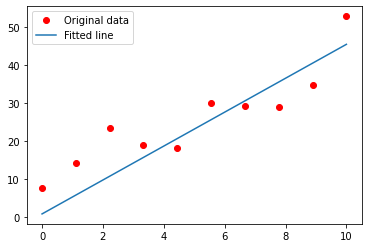

step: 4, loss: 44.057091, W: 4.516263, b: 0.792206


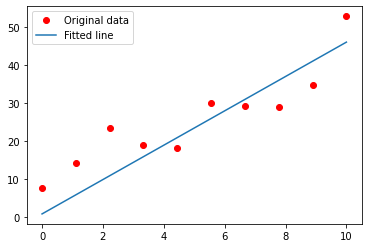

step: 5, loss: 43.829018, W: 4.526552, b: 0.839999


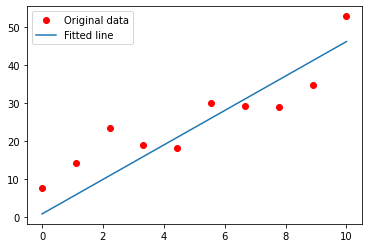

step: 6, loss: 43.620289, W: 4.524822, b: 0.885807


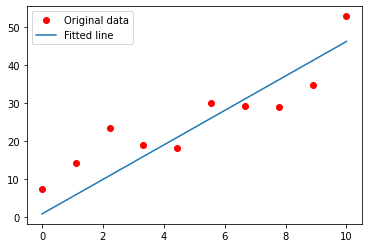

step: 7, loss: 43.415264, W: 4.519728, b: 0.930872


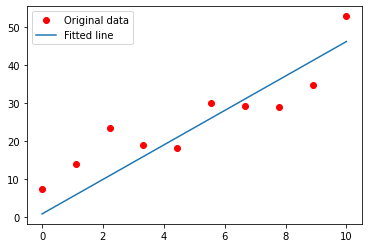

step: 8, loss: 43.212654, W: 4.513712, b: 0.975545


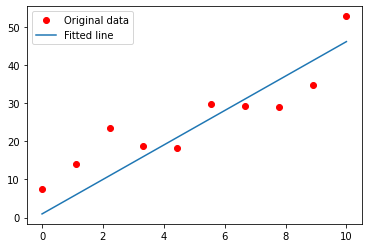

step: 9, loss: 43.012348, W: 4.507463, b: 1.019926


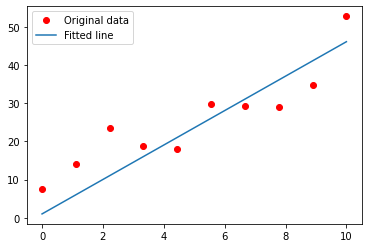

step: 10, loss: 42.814308, W: 4.501173, b: 1.064045


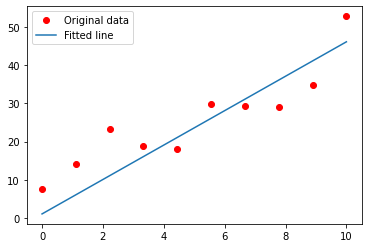

In [12]:
# Run training for the given number of steps.
for epoches in range(epoch):
    # Run the optimization to update W and b values.
    train_step(X,Y)
    
    pred = linear_regression(X)
    loss = mean_square(pred, Y)
    print("step: %i, loss: %f, W: %f, b: %f" % (epoches+1, loss, W.numpy(), B.numpy()))
    plt.plot(X, Y, 'ro', label='Original data')
    plt.plot(X, np.array(W * X + B), label='Fitted line')
    plt.legend()
    plt.show()